In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [95]:
X = df.drop('sales',axis=1)
y=df['sales']

In [96]:
from sklearn.preprocessing import PolynomialFeatures


In [97]:
poly_conv = PolynomialFeatures(degree=2,include_bias=False,interaction_only=False)

In [98]:
poly_conv.fit(X)

PolynomialFeatures(include_bias=False)

In [99]:
poly_feat = poly_conv.transform(X)
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [100]:
230.1*37.8

8697.779999999999

In [101]:
230.1*69.2

15922.92

In [102]:
37.8*69.2

2615.7599999999998

In [103]:
230.1**2

52946.009999999995

In [104]:
37.8**2

1428.8399999999997

In [105]:
69.2**2

4788.64

In [106]:
#poly_conv.fit_transform(X)

In [107]:
poly_feat.shape

(200, 9)

In [108]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [109]:
#Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(poly_feat,y, test_size=1/3,random_state=101)

In [110]:
#Create an instance of the model with parameters

from sklearn.linear_model import LinearRegression

mod = LinearRegression()
mod.fit(X_train,y_train)

LinearRegression()

In [111]:
#Calculate metrics to check performance of model
 
y_pred = mod.predict(X_test)

In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test,y_pred)
MAE

0.4794430359471399

In [113]:
MSE = mean_squared_error(y_test,y_pred)
MSE

0.41451831272887

In [114]:
RMSE = np.sqrt(MSE)
RMSE

0.6438309659599094

### Choosing a model


* Create diff order of polynomial X data
* Split that poly data for train/tets
* Fit in training data
* Report back metrics on both train and test
* Plot the results and check for bias-variance

In [116]:
#Training Error per degree
train_rmse = []

#Test Error per degree
test_rmse = []

for d in range(1,10):
    
    #create poly dataset for degree d
    poly_conv_d = PolynomialFeatures(degree=d,include_bias=False)
    poly_feat_d = poly_conv_d.fit_transform(X)
    
    #Split this into Train/Test set
    X_train, X_test, y_train, y_test = train_test_split(poly_feat_d,y,test_size=1/3,random_state=101)
    
    #Train the model
    mod_d = LinearRegression()
    mod_d.fit(X_train,y_train)
    
    #Predict on both train and test set
    train_pred = mod_d.predict(X_train)
    test_pred = mod_d.predict(X_test)
    
    #Calculate Errors
    
    #Errors on train set
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    #Errors on test set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))
    
    #Append errors to lists for plotting
    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

In [120]:
test_rmse

[1.5210434410491822,
 0.6438309659599094,
 0.553528079415266,
 0.5023537593832755,
 2.3282596214421964,
 10.995597442213946,
 785.9449157651961,
 666.6200720432877,
 137202.13559244433]

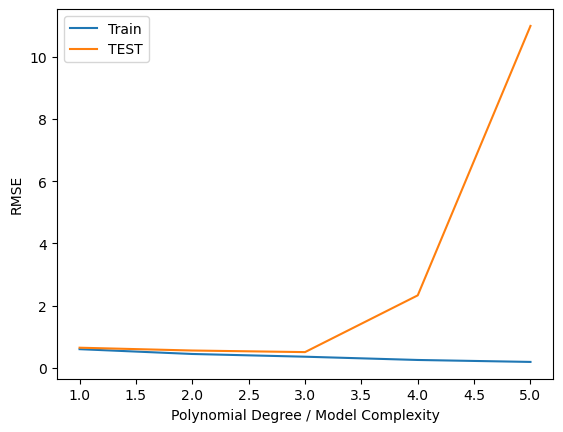

In [122]:
plt.plot(range(1,6),train_rmse[1:6],label='Train')
plt.plot(range(1,6),test_rmse[1:6],label='TEST')
plt.xlabel('Polynomial Degree / Model Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Finalizing Model Choice

In [123]:
final_poly_conv = PolynomialFeatures(degree=3,include_bias=False)

final_model = LinearRegression()
final_model.fit(final_poly_conv.fit_transform(X),y)

LinearRegression()

In [125]:
from joblib import dump,load

dump(final_model, 'poly_model.joblib')


['poly_model.joblib']

In [126]:
dump(final_poly_conv,'poly_conv.joblib')

['poly_conv.joblib']

In [127]:
campaign = [[149,21,18],[149,21,1000]]

In [128]:
loaded_poly = load('poly_conv.joblib')
loaded_model = load('poly_model.joblib')

In [131]:
campaign_poly = loaded_poly.transform(campaign)
loaded_model.predict(campaign_poly)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([   14.41199109, -2031.97847096])